In [1]:
2+2

4

In [2]:
using Distributions
using Plots
using Posets

# Funciones

In [3]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = obtenerranks_depuntuacion(puntuaciones)#[sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    #ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    ranks = obtenerranks_depuntuacion(puntuaciones)
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end
function compara_rankingsypdp(pdp, puntuaciones)
    ranks = obtenerranks_depuntuacion(puntuaciones)
    #ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    [energia_local(r, pdp) for r in ranks]
end

compara_rankingsypdp (generic function with 1 method)

In [4]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)
metodom2 = x -> x |> m2 |> pareja_matrizadyacencia
metodom3 = x -> x |> m3 |> pareja_matrizadyacencia

#17 (generic function with 1 method)

In [5]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
matsesgada2 = [2.51 2.49; 2.49 2.51]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

# Datos

## Poca correlacion, con ruido

In [87]:
pdp, puntuaciones = generapuntuaciones_gaussian(20,7,2;varerror = .001,matnodos=matsesgada2)

([0 0 … 1 0; 1 0 … 1 1; … ; 0 0 … 0 0; 1 0 … 1 0], [0.4584815106406307 0.4617331685124588 … 0.46622834171789185 0.46674967388671484; 1.0 1.0 … 1.0 1.0; … ; 0.0 0.0 … 0.0 0.0; 0.5225998275149035 0.5248286361247492 … 0.5258004417793372 0.5260411201868329])

In [88]:
xx1= [caminatale(pdp,10^3) for _ in 1:100]|>unique!

2-element Array{Array{Int64,1},1}:
 [2, 5, 7, 3, 1, 4, 6]
 [2, 5, 7, 1, 3, 4, 6]

In [89]:
xx2=obtenerranks_depuntuacion(puntuaciones)|>unique!

2-element Array{Array{Int64,1},1}:
 [2, 5, 7, 1, 3, 4, 6]
 [2, 5, 7, 3, 1, 4, 6]

In [92]:
using Distributions

In [90]:
sort(intersect(xx1,xx2)) == sort(xx2)

true

## Poca correlacion, con ruido

Se va  acomparar el pdp con los rankings

In [22]:
datos_ruido_sinsesgo_ruido0p1 = [generapuntuaciones_gaussian(10,7,2;varerror = 0.1) for _ in 1:10^3];

datos_ruido_consesgo_ruido0p1 = [generapuntuaciones_gaussian(10,7,2;varerror = 0.1,matnodos=matsesgada2) for _ in 1:10^3];

comparativa_rankspdp_sinsesgo_ruido0p1 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_sinsesgo_ruido0p1];

comparativa_rankspdp_consesgo_ruido0p1 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_consesgo_ruido0p1];

In [13]:
datos_ruido_sinsesgo_ruido0p2 = [generapuntuaciones_gaussian(10,7,2;varerror = 0.25) for _ in 1:10^3];

datos_ruido_consesgo_ruido0p2 = [generapuntuaciones_gaussian(10,7,2;varerror = 0.25,matnodos=matsesgada2) for _ in 1:10^3];

comparativa_rankspdp_sinsesgo_ruido0p2 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_sinsesgo_ruido0p2];

comparativa_rankspdp_consesgo_ruido0p2 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_consesgo_ruido0p2];

In [20]:
datos_ruido_sinsesgo_ruido0p5 = [generapuntuaciones_gaussian(10,7,2;varerror = 0.50) for _ in 1:10^3];

datos_ruido_consesgo_ruido0p5 = [generapuntuaciones_gaussian(10,7,2;varerror = 0.50,matnodos=matsesgada2) for _ in 1:10^3];

comparativa_rankspdp_sinsesgo_ruido0p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_sinsesgo_ruido0p5];

comparativa_rankspdp_consesgo_ruido0p5 = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_consesgo_ruido0p5];

## Mas correlacion, maximo ruido

Se va  acomparar el pdp con los rankings

In [14]:
datos_ruido_sinsesgo = [generapuntuaciones_gaussian(10,7,2;varerror = 0.99) for _ in 1:10^3];

In [15]:
datos_ruido_consesgo = [generapuntuaciones_gaussian(10,7,2;varerror = 0.99,matnodos=matsesgada2) for _ in 1:10^3];

In [16]:
comparativa_rankspdp_sinsesgo = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_sinsesgo];

In [17]:
comparativa_rankspdp_consesgo = [compara_rankingsypdp(pdp, puntos) for (pdp, puntos) in datos_ruido_consesgo];

# Resultados

## Sesgo; poco ruido

Ruido: 0.1

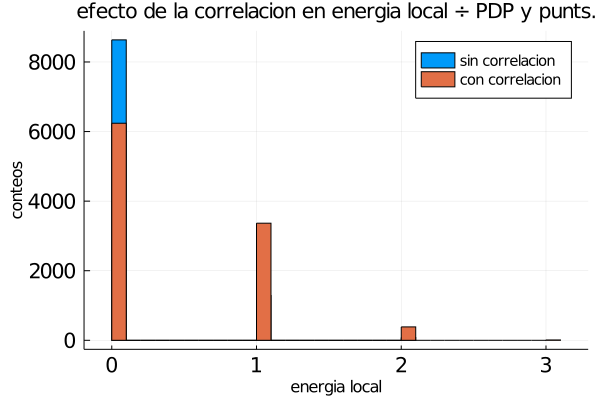

In [23]:
histogram([vcat(comparativa_rankspdp_sinsesgo_ruido0p1...),vcat(comparativa_rankspdp_consesgo_ruido0p1...)],
labels=["sin correlacion" "con correlacion"],
xlabel="energia local",ylabel="conteos",
xtickfontsize=14,
ytickfontsize=14,
legendfontsize=10,
title = "efecto de la correlacion en energia local ÷ PDP y punts.")

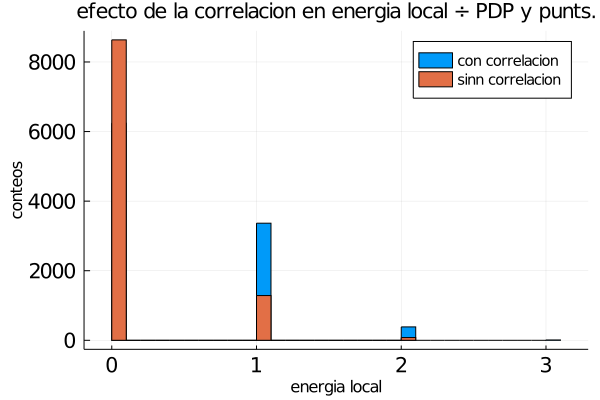

In [25]:
histogram([vcat(comparativa_rankspdp_consesgo_ruido0p1...),vcat(comparativa_rankspdp_sinsesgo_ruido0p1...)],
labels=["con correlacion" "sinn correlacion"],
xlabel="energia local",ylabel="conteos",
xtickfontsize=14,
ytickfontsize=14,
legendfontsize=10,
title = "efecto de la correlacion en energia local ÷ PDP y punts.")

Ruido: 0.25

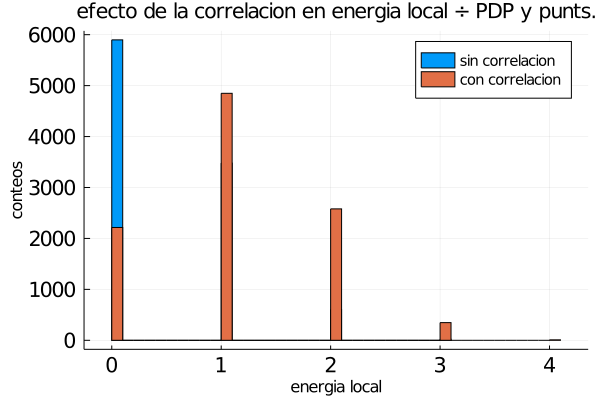

In [18]:
histogram([vcat(comparativa_rankspdp_sinsesgo_ruido0p2...),vcat(comparativa_rankspdp_consesgo_ruido0p2...)],
labels=["sin correlacion" "con correlacion"],
xlabel="energia local",ylabel="conteos",
xtickfontsize=14,
ytickfontsize=14,
legendfontsize=10,
title = "efecto de la correlacion en energia local ÷ PDP y punts.")

Mas ruido: 0.5

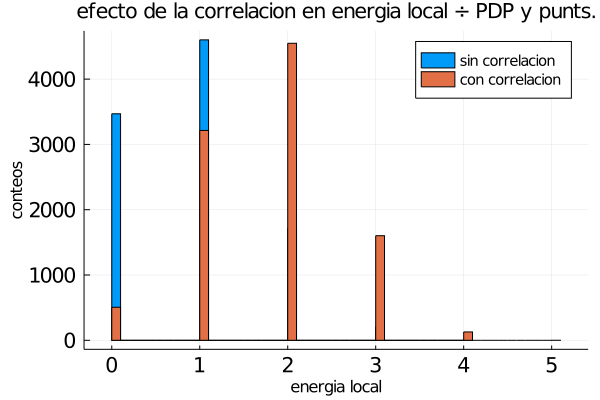

In [21]:
histogram([vcat(comparativa_rankspdp_sinsesgo_ruido0p5...),vcat(comparativa_rankspdp_consesgo_ruido0p5...)],
labels=["sin correlacion" "con correlacion"],
xlabel="energia local",ylabel="conteos",
xtickfontsize=14,
ytickfontsize=14,
legendfontsize=10,
title = "efecto de la correlacion en energia local ÷ PDP y punts.")

## Correlacion  sin ruido

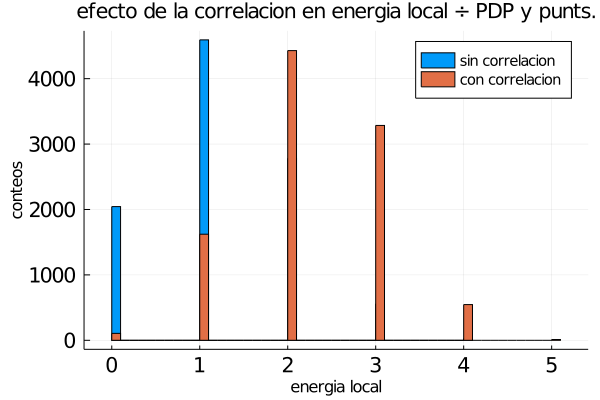

In [19]:
histogram([vcat(comparativa_rankspdp_sinsesgo...),vcat(comparativa_rankspdp_consesgo...)],
labels=["sin correlacion" "con correlacion"],
xlabel="energia local",ylabel="conteos",
xtickfontsize=14,
ytickfontsize=14,
legendfontsize=10,
title = "efecto de la correlacion en energia local ÷ PDP y punts.")

# Imagenes correlacion

In [62]:
matsesgada2 = [2.51 2.49; 2.49 2.51]

2×2 Array{Float64,2}:
 2.51  2.49
 2.49  2.51

In [63]:
matsesgada = [2.6 2.4; 2.4 2.6]

2×2 Array{Float64,2}:
 2.6  2.4
 2.4  2.6

In [64]:
puntos_sesgo = rand(MvNormal([0 for _ in 1:2],matsesgada),10^3)

2×1000 Array{Float64,2}:
 -0.442078  1.71043   0.112003   1.73797  …  2.48374  0.66872   -0.134496
 -0.360178  1.61168  -0.0945475  2.03802     2.20412  0.948072  -0.314032

In [65]:
puntos_sesgo2 = rand(MvNormal([0 for _ in 1:2],matsesgada2),10^3)

2×1000 Array{Float64,2}:
 2.25498  1.32163  -0.170569  -1.96591  …  -0.911043  1.49687  0.497435
 2.00905  1.08149  -0.515929  -1.90887     -1.13235   1.84817  0.699968

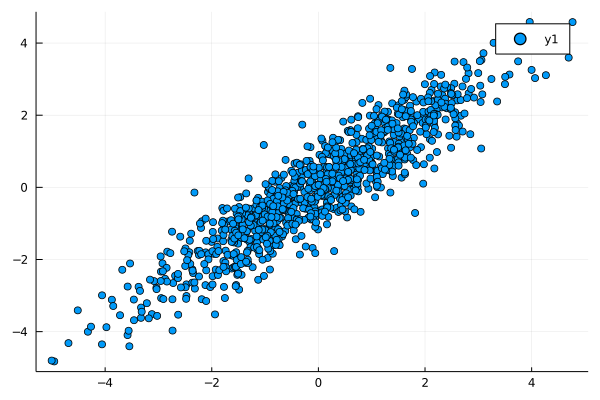

In [66]:
scatter([(puntos_sesgo[:,i][1],puntos_sesgo[:,i][2]) for i in 1:10^3])

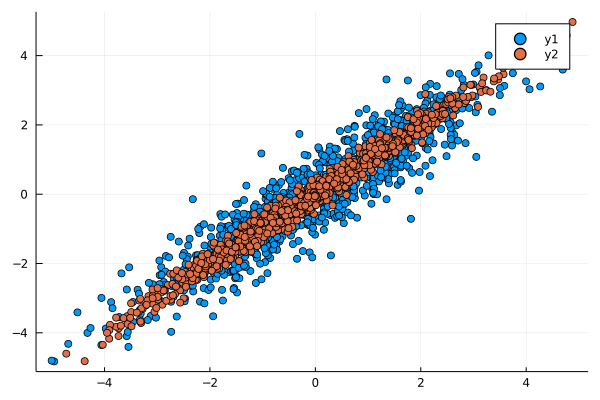

In [67]:
scatter!([(puntos_sesgo2[:,i][1],puntos_sesgo2[:,i][2]) for i in 1:10^3])

In [46]:
plot( [[(puntos_sesgo[:,i][1],puntos_sesgo[:,i][2]) for i in 1:10^3] [(puntos_sesgo2[:,i][1],puntos_sesgo2[:,i][2]) for i in 1:10^3]],ratio = :equal)

LoadError: Cannot convert Array{Tuple{Float64,Float64},2} to series data for plotting

## Sesgo

In [73]:
[energia_local(caminatale(datos_ruido_consesgo[1][1],10^3), datos_ruido_consesgo[1][1]) for _ in 1:10]

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [75]:
[energia_local(rank, datos_ruido_consesgo[1][1]) for rank in obtenerranks_depuntuacion(datos_ruido_consesgo[1][2])]

10-element Array{Int64,1}:
 2
 3
 2
 1
 3
 3
 3
 2
 1
 2

In [76]:
[caminatale(datos_ruido_consesgo[1][1],10^3) for _ in 1:10]|>unique!

1-element Array{Array{Int64,1},1}:
 [5, 3, 4, 1, 2, 6, 7]

In [77]:
obtenerranks_depuntuacion(datos_ruido_consesgo[1][2])

10-element Array{Array{Int64,1},1}:
 [3, 1, 5, 6, 4, 2, 7]
 [3, 5, 1, 4, 6, 2, 7]
 [3, 2, 5, 1, 6, 4, 7]
 [1, 5, 3, 4, 2, 6, 7]
 [4, 5, 7, 1, 3, 2, 6]
 [3, 1, 5, 6, 4, 7, 2]
 [5, 4, 3, 7, 1, 6, 2]
 [4, 1, 2, 3, 6, 5, 7]
 [4, 1, 5, 3, 2, 6, 7]
 [5, 2, 3, 4, 7, 1, 6]